<a href="https://colab.research.google.com/github/mobukerk/Data_Journey/blob/main/05_regressao_mult_avancada_30out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R²: 0.469
MAE (Erro Médio Absoluto): 0.737
RMSE (Raiz do Erro Quadrático): 1.006


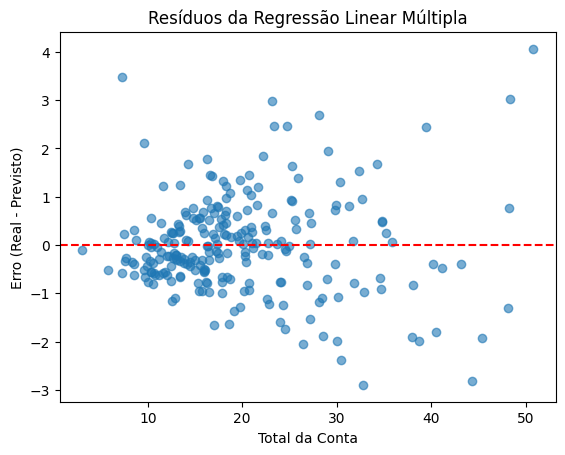

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Dataset
df = sns.load_dataset("tips")
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})

# Variáveis
X = df[["total_bill", "size", "smoker"]]
y = df["tip"]

# Modelo
modelo = LinearRegression()
modelo.fit(X, y)
df["pred"] = modelo.predict(X)

# Avaliação
r2 = r2_score(y, df["pred"])
mae = mean_absolute_error(y, df["pred"])
rmse = np.sqrt(mean_squared_error(y, df["pred"]))

print(f"R²: {r2:.3f}")
print(f"MAE (Erro Médio Absoluto): {mae:.3f}")
print(f"RMSE (Raiz do Erro Quadrático): {rmse:.3f}")

# Resíduos
df["residuo"] = y - df["pred"]

# Gráfico de resíduos
plt.scatter(df["total_bill"], df["residuo"], alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Resíduos da Regressão Linear Múltipla")
plt.xlabel("Total da Conta")
plt.ylabel("Erro (Real - Previsto)")
plt.show()
